In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data/03-primas_bajas.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


Happy coding💪🏽

# Pair Programming Correlación y covarianza

## Ana Campos y Ana González

### En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

#### - Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

        - La covariancia es más cualitativa, indica si existe o no relación entre las variables, y su tipo, que puede ser, directa, o indirecta.
        - Por el contrario, la correlación, a demás de indicar el tipo, informa de la dirección, y la fortaleza de la misma, es decir, como de  relacionadas están las dos variables

#### - Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [5]:
df.cov()

,age,bmi,children,charges
age,195.399408,11.874767,0.730325,3.966002e+04
bmi,11.874767,35.081169,-0.022390,-3.695489e+02
children,0.730325,-0.022390,1.502556,8.620422e+02
charges,39660.016982,-369.548864,862.042187,2.223041e+07


        - A mayor edad y número de hijos, existe relacion directa con el valor de la prima
        - Sin embargo la relación con bmi es negativa **nos parece extraño**, según aumenta el peso, la prima disminuye.Por lo que tendremos que hacer test complementarios.
        

In [6]:
df_corr=df.corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.143426,0.042623,0.601752
bmi,0.143426,1.000000,-0.003084,-0.013233
children,0.042623,-0.003084,1.000000,0.149156
charges,0.601752,-0.013233,0.149156,1.000000


In [7]:
# nos vamos a crear una lista con los nombres de las correlaciones que queremos ver:
correlaciones = ["pearson",  "spearman", "kendall"]

# iteramos por nuestra lista
for indice in correlaciones: 
    print(f"------- La correlación de {indice} es: ")
    print(df.corr(method = indice)) # calculamos la correlación.

------- La correlación de pearson es: 
               age       bmi  children   charges
age       1.000000  0.143426  0.042623  0.601752
bmi       0.143426  1.000000 -0.003084 -0.013233
children  0.042623 -0.003084  1.000000  0.149156
charges   0.601752 -0.013233  0.149156  1.000000
------- La correlación de spearman es: 
               age       bmi  children   charges
age       1.000000  0.139939  0.066986  0.707777
bmi       0.139939  1.000000 -0.001039  0.007560
children  0.066986 -0.001039  1.000000  0.166845
charges   0.707777  0.007560  0.166845  1.000000
------- La correlación de kendall es: 
               age       bmi  children   charges
age       1.000000  0.095802  0.050451  0.655907
bmi       0.095802  1.000000 -0.000608  0.006606
children  0.050451 -0.000608  1.000000  0.131157
charges   0.655907  0.006606  0.131157  1.000000


#### - Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

In [8]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

/tmp/ipykernel_5218/1424773859.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


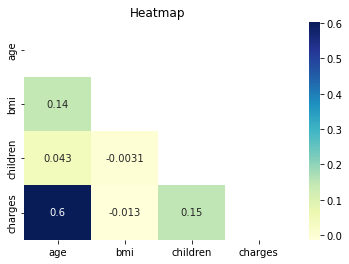

In [13]:

sns.heatmap(df_corr, # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu",
            mask=mask, # para especoficar el color del mapa
           annot = True); 
plt.title('Heatmap')
plt.savefig('data/heatmap.png')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

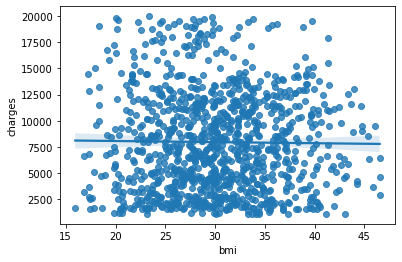

In [11]:
sns.regplot(data=df, x='bmi', y='charges')

Despues de profundizar en el análisis estadístico y visual de las variables bmi y charges, podemos decir que auqnue la covarianza sea negativa, las correlaciones de Spearman y Kendall, son casi 0 y positivas. Spearman casi 0 pero negativa. Visualmente despues de ver el heatmap y el regplot, concluimos que no existe relación aparente.

#### - Guardad la gráfica del heatmap.

In [ ]:
#plt.savefig('../graphs/ana_formacion_eu.png')